# **Project work: Title**

**Module:** Image and Signal Processing (ISP-AD23-FS25)  
**Authors:** Hädener Anja, Heini Sara, Huber Yeji       
**Date:** 14.05.2025


## **Introduction**

**What problem are you addressing, and why is it relevant?**     

In pharmaceutical manufacturing, especially during the production of pre-filled syringes and similar medical devices, visual inspection for quality control is a mandatory and highly critical step. Currently, this process is carried out manually by trained personnel who inspect each syringe for potential defects such as air bubbles, foreign particles, or missing liquid content.     
However, manual inspection poses several challenges: it requires significant training time, is susceptible to human error, and leads to rapid visual fatigue. In real-world operations, inspectors typically need to take a break after 30 minutes of work due to eye strain. Additionally, to maximize production efficiency, manufacturing lines often run continuously—including overnight shifts—which makes it difficult and costly to rely exclusively on human labor.     
If this process could be automated, it could address many of these issues: reducing training overhead, minimizing errors, supporting 24/7 operations, and improving overall manufacturing throughput and consistency.

**What kind of image or signal data are you working with?**     

We are working with RGB image data captured via webcam. The dataset includes images of syringes in various conditions:

(1) Reference syringes (usable)     
(2) Syringes containing air bubbles      
(3) Syringes with foreign objects     
(4) Empty syringes     

These images are used for both training and evaluating a classification model that determines whether a syringe is usable or defective.

**What is the main goal of your processing task?**     

The main objective of our image processing task is to build an automated system that analyzes real-time images of syringes and determines whether each one meets usability criteria. By comparing the live input to reference examples using computer vision techniques, the system should be able to detect visual anomalies such as air bubbles, contamination, or missing liquid. Ultimately, the goal is to support or replace human inspection in pharmaceutical quality control—ensuring consistent accuracy while enabling 
high-throughput and around-the-clock production.

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Use this section to introduce and motivate your project. Provide enough context for fellow students to understand your goals.

<ul style="color:#2D8FF3">
    <li>What problem are you addressing, and why is it relevant?</li>
    <li>What kind of image or signal data are you working with?</li>
    <li>What is the main goal of your processing task?</li>
</ul>

---
## **Setup**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
This section is about configuring the Jupyter Notebook.  
You don't need to do much here – just make sure everything runs correctly.
</span>


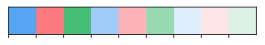

In [1]:
# Basic imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv

# Enable vectorized graphics
%config InlineBackend.figure_formats = ["svg"]
%matplotlib inline

# Setup plotting
PALETTE = [ (0.341, 0.648, 0.962, 1.0), 
            (0.990, 0.476, 0.494, 1.0), 
            (0.281, 0.749, 0.463, 1.0), 
            (0.629, 0.802, 0.978, 1.0), 
            (0.994, 0.705, 0.715, 1.0), 
            (0.595, 0.858, 0.698, 1.0), 
            (0.876, 0.934, 0.992, 1.0), 
            (0.998, 0.901, 0.905, 1.0), 
            (0.865, 0.952, 0.899, 1.0) ]

sns.palplot(PALETTE, size=0.5)
sns.set_style("whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETTE)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["pdf.fonttype"] = 42

---
## **Implementation**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
In this section, explain how you implemented your solution, focusing on the key processing steps and how they were translated into code. Justify your design choices and parameter settings, and describe any challenges you encountered during development. Structure this part like a tutorial to make it easy for fellow students to follow and learn from your approach.

<ul style="color:#2D8FF3">
    <li>Which key functions, algorithms, or libraries (e.g., NumPy, OpenCV, librosa, etc.) did you use?</li>
    <li>How is your processing pipeline structured? (e.g., filtering → transformation → output)</li>
    <li>Explain any relevant design decisions (e.g., kernel size, interpolation method, threshold values).</li>
    <li>If you implemented parts yourself (e.g., a filter or transform), briefly explain how.</li>
</ul>

<b>Hint:</b> To keep your code clean and modular, encapsulate your processing or feature (as well as the intermediate processing steps) into functions. See the example below for illustration.

</span>





## Implementation

This project was implemented in Python using several standard libraries for image processing and machine learning, primarily **OpenCV**, **NumPy**, **Matplotlib**, and **scikit-learn**.

### 1. Key Libraries and Tools
- **OpenCV**: Used for live video capture, image preprocessing, contour detection, and drawing.
- **NumPy**: Used for numerical operations and array manipulations.
- **Matplotlib** and **Seaborn**: Used for visualization and plotting.
- **scikit-learn**: Used to implement a basic machine learning pipeline (Random Forest classifier).

### 2. Processing Pipeline Structure
The processing pipeline is modular and follows this structure:

1. **Capture**: A live video feed is accessed via `cv.VideoCapture(0)`.
2. **Preprocessing**: Each frame is converted to grayscale, smoothed using a Gaussian blur, and processed using Canny edge detection.
3. **Contour Detection**: External contours are extracted from the edge map using `cv.findContours()`.
4. **Filtering**: Only contours within a specified area range are retained to eliminate noise and background elements.
5. **Bounding and ROI Saving**: Valid contours are highlighted on the video stream, and the corresponding regions (ROIs) are saved to disk.
6. **Machine Learning Integration** (offline): A `RandomForestClassifier` is trained to distinguish between “ok” and “defect” syringe samples.

Each step is encapsulated in a Python function for clarity and reusability.

### 3. Design Decisions and Parameters
- **Canny edge thresholds**: `(30, 100)` for sensitivity to small defects.
- **Gaussian blur kernel size**: `(5, 5)` to reduce noise while maintaining edge quality.
- **Contour area filtering**: Only areas between `500` and `30000` pixels are considered relevant.
- **ROI resize for ML**: Each image is resized to `64×64` for training, balancing detail with performance.

### 4. Challenges Encountered
- The syringe needs to be held very close to the camera to detect fine surface defects.
- Initial Canny thresholds were too high and failed to capture small scratches or cracks.
- Uneven lighting conditions introduced noise; consistent illumination improved accuracy.
- Automating the ROI extraction and naming was necessary for efficient dataset generation.

### 5. Modularity
All main processing steps are implemented as standalone functions:

- `preprocess_frame(frame)`
- `find_valid_contours(edges)`
- `draw_bounding_boxes(frame, contours)`
- `save_rois(frame, contours, frame_id)`
- `load_dataset(base_path)`

This structure allows for easy extension, reuse, and integration of additional logic (e.g., classification, augmentation).

### 1. Key Libraries and Tools

In [2]:
from datetime import datetime
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder

### 2. Processing Pipeline Structure

#### preprocessing

In [82]:
def preprocess_frame(frame):
    # Convert to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Apply CLAHE with adjusted parameters for phone camera
    clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    # Stronger blur for phone camera's higher detail
    blur = cv.GaussianBlur(gray, (7, 7), 0)
    
    # Adjust Canny parameters for phone camera
    edges = cv.Canny(blur, 40, 120)
    
    # More aggressive dilation to connect edges
    kernel = np.ones((3,3), np.uint8)
    edges = cv.dilate(edges, kernel, iterations=2)
    
    return edges

def find_largest_contour(edges, min_area=2000, min_aspect_ratio=2.0):
    """Find the largest contour that matches horizontal syringe criteria"""
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    valid_contours = []
    for contour in contours:
        area = cv.contourArea(contour)
        if area < min_area:
            continue
            
        # Get bounding rectangle
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = w / h  # For horizontal syringes, width should be greater than height
        
        # Check if the contour is wide enough and has the right shape
        if aspect_ratio >= min_aspect_ratio:
            valid_contours.append(contour)
    
    if not valid_contours:
        return None
        
    # Return the largest valid contour
    return [max(valid_contours, key=cv.contourArea)]

def draw_bounding_boxes(frame, contours):
    if contours is None:
        return frame
        
    for cnt in contours:
        # Get rotated rectangle for better fit
        rect = cv.minAreaRect(cnt)
        box = cv.boxPoints(rect)
        box = np.int32(box)
        
        # Draw rotated rectangle in green
        cv.drawContours(frame, [box], 0, (0, 255, 0), 2)
        
        # Draw regular bounding box in blue
        x, y, w, h = cv.boundingRect(cnt)
        cv.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Add text showing dimensions
        cv.putText(frame, f"Width: {w}px", (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv.putText(frame, f"Height: {h}px", (x, y-25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
        # Add aspect ratio
        aspect_ratio = w / h
        cv.putText(frame, f"Aspect Ratio: {aspect_ratio:.2f}", (x, y-40), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
    return frame

def save_rois(frame, contours, frame_id, output_dir="detected_syringes"):
    """Save the detected regions of interest (ROIs)"""
    if contours is None:
        return
        
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    for i, cnt in enumerate(contours):
        # Get bounding rectangle
        x, y, w, h = cv.boundingRect(cnt)
        
        # Add padding around the ROI
        padding = 20
        y_start = max(0, y - padding)
        y_end = min(frame.shape[0], y + h + padding)
        x_start = max(0, x - padding)
        x_end = min(frame.shape[1], x + w + padding)
        
        # Extract ROI with padding
        roi = frame[y_start:y_end, x_start:x_end]
        
        # Save ROI with timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"{output_dir}/syringe_{frame_id}_{timestamp}.jpg"
        cv.imwrite(filename, roi)

#### capture

In [85]:
def run_detection():
    # Try different camera indices - Iriun often uses index 1 or 2
    camera_indices = [1]
    cap = None
    
    # Try to find the correct camera
    for idx in camera_indices:
        print(f"Trying camera index {idx}...")
        cap = cv.VideoCapture(idx)
        if cap.isOpened():
            # Try to get a frame
            ret, test_frame = cap.read()
            if ret:
                print(f"Successfully connected to camera {idx}")
                break
            else:
                cap.release()
        
    if cap is None or not cap.isOpened():
        print("Could not find Iriun camera. Make sure it's running and try again.")
        return

    # Get the actual frame size
    frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    print(f"Camera resolution: {frame_width}x{frame_height}")

    print("Camera is running. Press 'q' to quit, 's' to save current frame")
    print("Detecting horizontal syringes...")
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Resize frame if it's too large (optional, remove if you want full resolution)
        if frame_width > 1280:
            scale_factor = 1280 / frame_width
            new_width = 1280
            new_height = int(frame_height * scale_factor)
            frame = cv.resize(frame, (new_width, new_height))

        # Create a copy for display
        display_frame = frame.copy()
        
        # Process frame
        edges = preprocess_frame(frame)
        valid_contours = find_largest_contour(edges)
        
        # Draw edges for debugging
        edges_display = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
        
        if valid_contours:
            display_frame = draw_bounding_boxes(display_frame, valid_contours)
            save_rois(frame, valid_contours, frame_count)
        
        # Show both the edges and the result
        # Resize windows to fit screen if needed
        display_size = (800, 600)  # Adjust these values if needed
        edges_resized = cv.resize(edges_display, display_size)
        result_resized = cv.resize(display_frame, display_size)
        combined_display = np.hstack([edges_resized, result_resized])
        
        cv.imshow("Detection (Edges | Result)", combined_display)

        key = cv.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('s'):
            # Save both the edge detection and final result
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            cv.imwrite(f"syringe_edges_{timestamp}.jpg", edges)
            cv.imwrite(f"syringe_detection_{timestamp}.jpg", display_frame)
            print(f"Saved frames with timestamp {timestamp}")

        frame_count += 1

    cap.release()
    cv.destroyAllWindows()

#### detect defects

In [71]:
def crop_center_coords(image, size=0.5):
    h, w = image.shape
    ch, cw = int(h * size), int(w * size)
    sy, sx = (h - ch) // 2, (w - cw) // 2
    return image[sy:sy+ch, sx:sx+cw], sx, sy

def mask_text_regions(image, top_ratio=0.2, bottom_ratio=0.2):
    """상단/하단 텍스트 영역 마스킹"""
    h, w = image.shape
    mask = np.ones_like(image, dtype=np.uint8) * 255
    top = int(h * top_ratio)
    bottom = int(h * (1 - bottom_ratio))
    mask[:top, :] = 0
    mask[bottom:, :] = 0
    return cv.bitwise_and(image, image, mask=mask)

def detect_bubbles_by_blobs(gray, center_ratio=0.5,
                            min_area=30, max_area=1000,
                            min_circularity=0.6):
    """
    버블을 contour 기반으로 검출 (원형 블롭)
    """
    cropped, offset_x, offset_y = crop_center_coords(gray, size=center_ratio)
    blurred = cv.GaussianBlur(cropped, (5, 5), 0)

    # Thresholding
    _, thresh = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Invert: 버블이 밝은 경우만
    thresh = cv.bitwise_not(thresh)

    # 윤곽선 찾기
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    good_blobs = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        if not (min_area <= area <= max_area):
            continue

        perimeter = cv.arcLength(cnt, True)
        if perimeter == 0:
            continue

        circularity = 4 * np.pi * (area / (perimeter ** 2))
        if circularity < min_circularity:
            continue  # 너무 찌그러진 건 무시

        good_blobs.append(cnt)

    if len(good_blobs) > 0:
        return True, good_blobs, offset_x, offset_y
    else:
        return False, None, offset_x, offset_y



def detect_particles_center_strict(gray, center_ratio=0.5,
                                   min_area=80, max_area=500,
                                   max_mean_intensity=100,
                                   max_aspect_ratio=3.0,
                                   max_brightness_std=25):
    cropped, offset_x, offset_y = crop_center_coords(gray, size=center_ratio)
    thresh = cv.adaptiveThreshold(cropped, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv.THRESH_BINARY_INV, 11, 5)
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    h, _ = cropped.shape
    cy = h // 2

    for cnt in contours:
        area = cv.contourArea(cnt)
        if not (min_area <= area <= max_area):
            continue
        x, y, w, h_ = cv.boundingRect(cnt)
        if h_ == 0: continue
        aspect_ratio = max(w / h_, h_ / w)
        if aspect_ratio > max_aspect_ratio:
            continue
        if abs((y + h_//2) - cy) < h * 0.1:
            continue
        mask = np.zeros_like(cropped)
        cv.drawContours(mask, [cnt], -1, 255, -1)
        mean_intensity, stddev = cv.meanStdDev(cropped, mask=mask)
        if mean_intensity[0][0] > max_mean_intensity or stddev[0][0] < max_brightness_std:
            continue
        return True, cnt, offset_x, offset_y
    return False, None, offset_x, offset_y

def show_defects_with_annotations(predictions, roi_dir, max_examples=3):
    annotated_results = []
    detected_count = 0

    for filename, label in predictions.items():
        if label != "defect":
            continue

        path = os.path.join(roi_dir, filename)
        gray = cv.imread(path, cv.IMREAD_GRAYSCALE)
        if gray is None:
            continue
        color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

        # 마스킹 처리
        masked = mask_text_regions(gray)

        # 버블 검출
        has_bubble, bubble_contours, ox, oy = detect_bubbles_by_blobs(masked)

        if has_bubble:
            found_defect = True
            for cnt in bubble_contours:
                cnt_shifted = cnt + np.array([[ox, oy]])
                cv.drawContours(color, [cnt_shifted], -1, (0, 255, 0), 2)
        # 입자 검출
        has_particle, particle_cnt, ox_p, oy_p = detect_particles_center_strict(masked)
        if has_particle:
            cnt_shifted = particle_cnt + np.array([[ox_p, oy_p]])
            cv.drawContours(color, [cnt_shifted], -1, (0, 0, 255), 2)

        if has_bubble or has_particle:
            detected_count += 1
            if len(annotated_results) < max_examples:
                annotated_results.append((filename, color))

    # 결과 출력
    print(f"\n✅ {detected_count} images with detected defects")
    if annotated_results:
        plt.figure(figsize=(5 * len(annotated_results), 5))
        for i, (fname, img) in enumerate(annotated_results):
            plt.subplot(1, len(annotated_results), i + 1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
            plt.title(fname, fontsize=10)
            plt.axis("off")
        plt.tight_layout()
        plt.show()
    else:
        print("No visual defects detected.")


#### prediction

In [ ]:
def load_and_predict_randomforest(model):
    """
    Load ROI images from the detected_syringes directory and make predictions using the trained model
    
    Args:
        model: Trained classifier model
        
    Returns:
        Dictionary mapping image filenames to predictions
    """
    predictions = {}
    roi_dir = 'detected_syringes_ok'
    
    # Check if directory exists
    if not os.path.exists(roi_dir):
        print(f"Directory {roi_dir} not found")
        return None
        
    # Load and process each image
    for filename in os.listdir(roi_dir):
        if filename.endswith(('.jpg', '.png')):
            # Load image
            img_path = os.path.join(roi_dir, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            
            if img is None:
                print(f"Could not load image: {filename}")
                continue
                
            # Resize to match training data (64x64 since model expects 4096 features)
            img_resized = cv.resize(img, (64, 64))
            
            # Flatten and normalize
            img_flat = img_resized.flatten()
            
            # Make prediction
            prediction = model.predict([img_flat])[0]
            predictions[filename] = prediction
            
            # Print individual predictions
            print(f"{filename}: {prediction}")
            
    return predictions

In [14]:
def load_and_predict_rois_cnn(model, roi_dir):
    predictions = {}
    
    if not os.path.exists(roi_dir):
        print(f"Directory '{roi_dir}' does not exist")
        return predictions
        
    for filename in os.listdir(roi_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            # Load and preprocess image
            img_path = os.path.join(roi_dir, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            
            # Resize to match CNN input shape (64x64)
            img_resized = cv.resize(img, (64, 64))
            
            # Normalize and reshape for CNN
            img_normalized = img_resized / 255.0
            img_input = img_normalized.reshape(1, 64, 64, 1)  # Add batch and channel dimensions
            
            # Make prediction
            prediction = model.predict(img_input, verbose=0)[0]
            pred_class = "ok" if prediction[0] > 0.5 else "defect"
            predictions[filename] = pred_class
            
            # Print individual predictions
            print(f"{filename}: {pred_class}")
            
    return predictions

### 3. Model

#### preparation dataset

In [ ]:
def load_dataset(base_path="dataset", size=(64, 64)):
    data = []
    labels = []
    for label_name in ["ok", "defect"]:
        folder = os.path.join(base_path, label_name)
        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv.resize(img, size)
            data.append(img.flatten())
            labels.append(label_name)
    return np.array(data), np.array(labels)

In [ ]:
def augment_data(image):
    """
    Augment a single image with various transformations to multiply the dataset.
    Returns a list of augmented images.
    """
    augmented = []
    
    # augment rotations at finer angles
    for angle in range(0, 360, 30):  # Rotate every 30 degrees
        matrix = cv.getRotationMatrix2D((image.shape[1]/2, image.shape[0]/2), angle, 1.0)
        rotated = cv.warpAffine(image, matrix, (image.shape[1], image.shape[0]))
        augmented.append(rotated)
    
    # augment flips and combinations
    flipped_h = cv.flip(image, 1)
    flipped_v = cv.flip(image, 0)
    flipped_both = cv.flip(image, -1)
    augmented.extend([flipped_h, flipped_v, flipped_both])
    
    # augment noise levels
    for sigma in [10, 20, 30]:
        noise = np.random.normal(0, sigma, image.shape).astype(np.uint8)
        noisy = cv.add(image, noise)
        augmented.append(noisy)
    
    # augment brightness adjustments
    for delta in [-50, -25, 25, 50]:
        if delta > 0:
            adjusted = cv.add(image, delta)
        else:
            adjusted = cv.subtract(image, abs(delta))
        augmented.append(adjusted)
    
    # augment blur levels
    for kernel_size in [(3,3), (5,5), (7,7)]:
        blurred = cv.GaussianBlur(image, kernel_size, 0)
        augmented.append(blurred)
    
    # Contrast adjustments
    for alpha in [0.5, 1.5]:  # Contrast factors
        contrasted = cv.convertScaleAbs(image, alpha=alpha, beta=0)
        augmented.append(contrasted)
    
    # Combinations of transformations
    for rot_img in augmented[:3]:  # Take first few rotated images
        noise = np.random.normal(0, 15, rot_img.shape).astype(np.uint8)
        combo = cv.add(rot_img, noise)
        combo = cv.GaussianBlur(combo, (3,3), 0)
        augmented.append(combo)
    
    return augmented

In [11]:
# Load original dataset and augment
X_orig, y_orig = load_dataset()

# Augment data
X_augmented = []
y_augmented = []

for img, label in zip(X_orig, y_orig):
    # Reshape flattened image back to 2D
    img_2d = img.reshape(64, 64)
    
    # Add original image
    X_augmented.append(img)
    y_augmented.append(label)
    
    # Add augmented versions
    augmented_images = augment_data(img_2d)
    for aug_img in augmented_images:
        X_augmented.append(aug_img.flatten())
        y_augmented.append(label)

# Convert to numpy arrays
X = np.array(X_augmented)
y = np.array(y_augmented)

print(f"Original dataset size: {len(X_orig)}")
print(f"Augmented dataset size: {len(X)}")

# Split augmented data into train/test sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X, y, test_size=0.2, random_state=42)

Original dataset size: 3612
Augmented dataset size: 111972


#### RandomForest Classification

In [28]:
# Train model on augmented data
clf_aug = RandomForestClassifier(n_estimators=100, random_state=42)
clf_aug.fit(X_train_aug, y_train_aug)

# Evaluate model trained on augmented data
y_pred_aug = clf_aug.predict(X_test_aug)
print("\nModel performance with augmented training data:")
print(classification_report(y_test_aug, y_pred_aug))


Model performance with augmented training data:
              precision    recall  f1-score   support

      defect       0.97      1.00      0.98     17496
          ok       1.00      0.88      0.94      4899

    accuracy                           0.97     22395
   macro avg       0.98      0.94      0.96     22395
weighted avg       0.97      0.97      0.97     22395



#### CNN

In [12]:
# Convert labels to numeric values first

label_map = {'defect': 0, 'ok': 1}  # Added 'ok' mapping to match existing labels
y_train_numeric = np.array([label_map[label] for label in y_train_aug])
y_test_numeric = np.array([label_map[label] for label in y_test_aug])

# Convert labels to categorical
y_train_cat = to_categorical(y_train_numeric)
y_test_cat = to_categorical(y_test_numeric)

# Reshape input data for CNN (add channel dimension)
X_train_reshaped = X_train_aug.reshape(-1, 64, 64, 1)
X_test_reshaped = X_test_aug.reshape(-1, 64, 64, 1)

# Normalize pixel values
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_normalized, y_train_cat,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_test_normalized, y_test_cat))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_cat)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test_normalized)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

c:\Users\yejih\Documents\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 99s 35ms/step - accuracy: 0.8566 - loss: 0.3092 - val_accuracy: 0.9664 - val_loss: 0.0891
Epoch 2/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 93s 33ms/step - accuracy: 0.9616 - loss: 0.0973 - val_accuracy: 0.9783 - val_loss: 0.0533
Epoch 3/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 101s 36ms/step - accuracy: 0.9762 - loss: 0.0612 - val_accuracy: 0.9838 - val_loss: 0.0433
Epoch 4/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 99s 35ms/step - accuracy: 0.9815 - loss: 0.0456 - val_accuracy: 0.9854 - val_loss: 0.0360
Epoch 5/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 100s 36ms/step - accuracy: 0.9857 - loss: 0.0368 - val_accuracy: 0.9873 - val_loss: 0.0329
Epoch 6/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 101s 36ms/step - accuracy: 0.9884 - loss: 0.0314 - val_accuracy: 0.9901 - val_loss: 0.0259
Epoch 7/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 100s 36ms/step - accuracy: 0.9893 - loss: 0.0277 - val_accuracy: 0.9887 - val_loss: 0.0300
Epoch 8/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 102s 36ms/step - accuracy: 0.9

---

## **Results**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Demonstrate the outcome of your solution. This section can be brief, but should show what your implementation produces.

<ul style="color:#2D8FF3">
    <li>Use representative input and output examples to illustrate the effect of your processing.</li>
    <li>Don't limit yourself to best-case results – also show cases where the method performs poorly or struggles.</li>
</ul>
</span>




#### run camera

In [86]:
# Start detection
run_detection()

Trying camera index 1...
Successfully connected to camera 1
Camera resolution: 640x480
Camera is running. Press 'q' to quit, 's' to save current frame
Detecting horizontal syringes...


#### Test of random forest model

**with ok syringe**

In [ ]:
predictions = load_and_predict_randomforest(clf_aug)

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
    # Make final verdict based on majority
    verdict = "OK" if ok_percent > 50 else "DEFECTIVE"
    confidence = max(ok_percent, defect_percent)
    print(f"\nFinal verdict: Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")

syringe_0_20250531_171832.jpg: defect
syringe_100_20250531_171835.jpg: defect
syringe_101_20250531_171835.jpg: defect
syringe_102_20250531_171835.jpg: defect
syringe_103_20250531_171835.jpg: defect
syringe_104_20250531_171835.jpg: defect
syringe_105_20250531_171835.jpg: defect
syringe_106_20250531_171835.jpg: defect
syringe_107_20250531_171835.jpg: defect
syringe_108_20250531_171835.jpg: defect
syringe_109_20250531_171835.jpg: defect
syringe_10_20250531_171832.jpg: defect
syringe_110_20250531_171835.jpg: defect
syringe_111_20250531_171835.jpg: defect
syringe_112_20250531_171835.jpg: defect
syringe_113_20250531_171835.jpg: defect
syringe_114_20250531_171835.jpg: defect
syringe_115_20250531_171836.jpg: defect
syringe_116_20250531_171836.jpg: defect
syringe_117_20250531_171836.jpg: defect
syringe_118_20250531_171836.jpg: defect
syringe_119_20250531_171836.jpg: defect
syringe_11_20250531_171832.jpg: defect
syringe_120_20250531_171836.jpg: defect
syringe_121_20250531_171836.jpg: defect
syri

#### Test CNN model

**test with not clear syringe(Demo)**

In [87]:
# Use the CNN-specific prediction function
predictions = load_and_predict_rois_cnn(model, roi_dir='detected_syringes')

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
# Make final verdict based on defect threshold
    defect_threshold = 5.0  # 5% threshold for defects
    verdict = "DEFECTIVE" if defect_percent > defect_threshold else "OK"
    confidence = defect_percent if verdict == "DEFECTIVE" else ok_percent
    print(f"\nFinal verdict (5% defect threshold): Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")

syringe_0_20250604_115055.jpg: ok
syringe_0_20250604_115155.jpg: defect
syringe_100_20250604_115059.jpg: ok
syringe_100_20250604_115158.jpg: ok
syringe_101_20250604_115059.jpg: ok
syringe_101_20250604_115159.jpg: ok
syringe_102_20250604_115059.jpg: ok
syringe_102_20250604_115159.jpg: ok
syringe_103_20250604_115059.jpg: defect
syringe_103_20250604_115159.jpg: ok
syringe_104_20250604_115059.jpg: ok
syringe_104_20250604_115159.jpg: ok
syringe_105_20250604_115059.jpg: ok
syringe_105_20250604_115159.jpg: ok
syringe_106_20250604_115059.jpg: ok
syringe_106_20250604_115159.jpg: ok
syringe_107_20250604_115059.jpg: ok
syringe_107_20250604_115159.jpg: ok
syringe_108_20250604_115059.jpg: ok
syringe_108_20250604_115159.jpg: ok
syringe_109_20250604_115059.jpg: ok
syringe_109_20250604_115159.jpg: ok
syringe_10_20250604_115056.jpg: ok
syringe_10_20250604_115155.jpg: ok
syringe_110_20250604_115059.jpg: defect
syringe_110_20250604_115159.jpg: ok
syringe_111_20250604_115059.jpg: ok
syringe_111_20250604_1

**test with okay syringe**

In [15]:
# Use the CNN-specific prediction function
predictions = load_and_predict_rois_cnn(model, roi_dir='detected_syringes_ok')

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
# Make final verdict based on defect threshold
    defect_threshold = 5.0  # 5% threshold for defects
    verdict = "DEFECTIVE" if defect_percent > defect_threshold else "OK"
    confidence = defect_percent if verdict == "DEFECTIVE" else ok_percent
    print(f"\nFinal verdict (5% defect threshold): Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")

syringe_0_20250531_171832.jpg: ok
syringe_100_20250531_171835.jpg: ok
syringe_101_20250531_171835.jpg: ok
syringe_102_20250531_171835.jpg: ok
syringe_103_20250531_171835.jpg: ok
syringe_104_20250531_171835.jpg: ok
syringe_105_20250531_171835.jpg: ok
syringe_106_20250531_171835.jpg: ok
syringe_107_20250531_171835.jpg: ok
syringe_108_20250531_171835.jpg: ok
syringe_109_20250531_171835.jpg: ok
syringe_10_20250531_171832.jpg: ok
syringe_110_20250531_171835.jpg: ok
syringe_111_20250531_171835.jpg: ok
syringe_112_20250531_171835.jpg: ok
syringe_113_20250531_171835.jpg: ok
syringe_114_20250531_171835.jpg: ok
syringe_115_20250531_171836.jpg: ok
syringe_116_20250531_171836.jpg: ok
syringe_117_20250531_171836.jpg: ok
syringe_118_20250531_171836.jpg: ok
syringe_119_20250531_171836.jpg: ok
syringe_11_20250531_171832.jpg: ok
syringe_120_20250531_171836.jpg: ok
syringe_121_20250531_171836.jpg: ok
syringe_122_20250531_171836.jpg: ok
syringe_123_20250531_171836.jpg: ok
syringe_124_20250531_171836.jpg:

**test with detected_syringes_with_bubbles**

In [73]:
# Use the CNN-specific prediction function
predictions = load_and_predict_rois_cnn(model, roi_dir='detected_syringes_with_bubbles')

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
# Make final verdict based on defect threshold
    defect_threshold = 5.0  # 5% threshold for defects
    verdict = "DEFECTIVE" if defect_percent > defect_threshold else "OK"
    confidence = defect_percent if verdict == "DEFECTIVE" else ok_percent
    print(f"\nFinal verdict (5% defect threshold): Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")



syringe_0_20250531_171052.jpg: ok
syringe_100_20250531_171055.jpg: ok
syringe_101_20250531_171055.jpg: ok
syringe_102_20250531_171055.jpg: ok
syringe_103_20250531_171055.jpg: ok
syringe_104_20250531_171055.jpg: ok
syringe_105_20250531_171055.jpg: ok
syringe_106_20250531_171055.jpg: ok
syringe_107_20250531_171055.jpg: ok
syringe_108_20250531_171055.jpg: ok
syringe_109_20250531_171056.jpg: ok
syringe_10_20250531_171052.jpg: ok
syringe_110_20250531_171056.jpg: ok
syringe_111_20250531_171056.jpg: ok
syringe_112_20250531_171056.jpg: ok
syringe_113_20250531_171056.jpg: ok
syringe_114_20250531_171056.jpg: ok
syringe_115_20250531_171056.jpg: ok
syringe_116_20250531_171056.jpg: ok
syringe_117_20250531_171056.jpg: ok
syringe_118_20250531_171056.jpg: ok
syringe_119_20250531_171056.jpg: ok
syringe_11_20250531_171052.jpg: ok
syringe_120_20250531_171056.jpg: ok
syringe_121_20250531_171056.jpg: ok
syringe_122_20250531_171056.jpg: ok
syringe_123_20250531_171056.jpg: ok
syringe_124_20250531_171056.jpg:

**test with okay syringe**

In [74]:
# Use the CNN-specific prediction function
predictions = load_and_predict_rois_cnn(model, roi_dir = 'detected_syringes_ok2')

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
# Make final verdict based on defect threshold
    defect_threshold = 5.0  # 5% threshold for defects
    verdict = "DEFECTIVE" if defect_percent > defect_threshold else "OK"
    confidence = defect_percent if verdict == "DEFECTIVE" else ok_percent
    print(f"\nFinal verdict (5% defect threshold): Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")

syringe_0_20250602_190701.jpg: ok
syringe_100_20250602_190704.jpg: ok
syringe_101_20250602_190704.jpg: ok
syringe_102_20250602_190704.jpg: ok
syringe_103_20250602_190704.jpg: ok
syringe_104_20250602_190705.jpg: ok
syringe_105_20250602_190705.jpg: ok
syringe_106_20250602_190705.jpg: ok
syringe_107_20250602_190705.jpg: ok
syringe_108_20250602_190705.jpg: ok
syringe_109_20250602_190705.jpg: ok
syringe_10_20250602_190701.jpg: ok
syringe_110_20250602_190705.jpg: ok
syringe_111_20250602_190705.jpg: ok
syringe_112_20250602_190705.jpg: ok
syringe_113_20250602_190705.jpg: ok
syringe_114_20250602_190705.jpg: ok
syringe_115_20250602_190705.jpg: ok
syringe_116_20250602_190705.jpg: ok
syringe_117_20250602_190705.jpg: ok
syringe_118_20250602_190705.jpg: ok
syringe_119_20250602_190705.jpg: ok
syringe_11_20250602_190701.jpg: ok
syringe_120_20250602_190705.jpg: ok
syringe_121_20250602_190705.jpg: ok
syringe_122_20250602_190705.jpg: ok
syringe_123_20250602_190705.jpg: ok
syringe_124_20250602_190705.jpg:

**test with particle syringe**

syringe_0_20250602_195733.jpg: ok
syringe_100_20250602_195736.jpg: ok
syringe_101_20250602_195737.jpg: ok
syringe_102_20250602_195737.jpg: ok
syringe_103_20250602_195737.jpg: ok
syringe_104_20250602_195737.jpg: ok
syringe_105_20250602_195737.jpg: ok
syringe_106_20250602_195737.jpg: ok
syringe_107_20250602_195737.jpg: ok
syringe_108_20250602_195737.jpg: ok
syringe_109_20250602_195737.jpg: ok
syringe_10_20250602_195733.jpg: ok
syringe_110_20250602_195737.jpg: ok
syringe_111_20250602_195737.jpg: ok
syringe_112_20250602_195737.jpg: ok
syringe_113_20250602_195737.jpg: ok
syringe_114_20250602_195737.jpg: ok
syringe_115_20250602_195737.jpg: ok
syringe_116_20250602_195737.jpg: ok
syringe_117_20250602_195737.jpg: ok
syringe_118_20250602_195737.jpg: ok
syringe_119_20250602_195737.jpg: ok
syringe_11_20250602_195734.jpg: ok
syringe_120_20250602_195737.jpg: ok
syringe_121_20250602_195737.jpg: ok
syringe_122_20250602_195737.jpg: ok
syringe_123_20250602_195737.jpg: ok
syringe_124_20250602_195737.jpg:

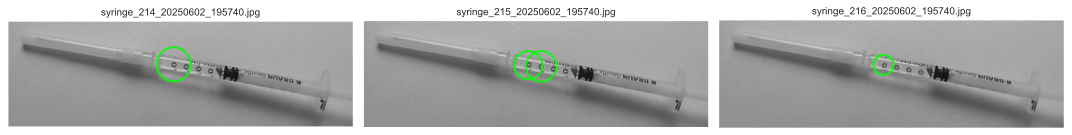

In [ ]:
# Use the CNN-specific prediction function
predictions = load_and_predict_rois_cnn(model, roi_dir='detected_syringes_particle')

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    total = len(predictions)
    ok_percent = (ok_count / total) * 100
    defect_percent = (defect_count / total) * 100
    
    print("\nSummary:")
    print(f"Total images processed: {total}")
    print(f"OK predictions: {ok_count} ({ok_percent:.1f}%)")
    print(f"Defective predictions: {defect_count} ({defect_percent:.1f}%)")
    
# Make final verdict based on defect threshold
    defect_threshold = 5.0  # 5% threshold for defects
    verdict = "DEFECTIVE" if defect_percent > defect_threshold else "OK"
    confidence = defect_percent if verdict == "DEFECTIVE" else ok_percent
    print(f"\nFinal verdict (5% defect threshold): Syringe is {verdict}")
else:
    print("\nNo ROIs were processed. Make sure there are images in the 'detected_syringes' directory.")

---

## **Discussion**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Reflect on your results and the overall performance of your solution. This section helps you and others understand what worked well, what did not, and why.

<ul>
    <li>Interpret your results: What patterns or weaknesses did you observe?</li>
    <li>How robust is your solution to variations in the input (e.g., noise, contrast, lighting)?</li>
    <li>Were there cases where your method failed or produced unexpected results? Why?</li>
    <li>What could be improved or extended in a future version?</li>
    <li>If applicable, compare your method to alternatives or standard approaches.</li>
</ul>

Be honest and analytical – this section is not about perfection, but about insight.
</span>



---

## **Appendix**

### **How to convert a Jupyter Notebook into a PDF**



<span style="color:#2D8FF3;font-style:italic">

<ul>
    <li>Run the entire Jupyter notebook and save it.</li>
    <li>Open a terminal and run the following command.<br>
       <tt></tt>
    </li>
     <div style="border: 1px solid #ccc; 
                 color: #A0A0A0;
                 padding: 4px; 
                 background-color: #f9f9f9; 
                 border-radius: 4px; 
                 width: 100%;
                 max-width: 60%;">
        <tt>jupyter nbconvert --to html "path/to/your/notebook.ipynb"</tt>.
    </div>
    <li>This creates a file notebook.html in the current working directory.</li>
    <li>Open the document in a web browser (the Opera browser works best, as it saves single-page PDFs!)</li>
    <li>Save as PDF</li>
</ul>
</span>